In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
from numpy import array
from numpy.linalg import norm
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier
import csv
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report as cr

# Reading Inputs

In [2]:
df=pd.read_csv('train.csv', header=None)

In [3]:
df.shape

(20000, 785)

# Splitting data into train(80%) and validation(20%)

In [4]:
df=pd.read_csv('./train.csv', header=None)
df_train,df_test=train_test_split(np.array(df) , test_size=0.2)

print(df_train.shape)
print(df_test.shape)

(16000, 785)
(4000, 785)


In [5]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Utility Function

In [6]:
def calc_metrics(Y_predict, Y_test):
    accuracy = metrics.accuracy_score(Y_test, Y_predict)
    precision = metrics.precision_score(Y_test, Y_predict, pos_label=1, average='macro')
    recall = metrics.recall_score(Y_test, Y_predict,pos_label=1, average='macro')
    f1_score = metrics.f1_score(Y_test, Y_predict,pos_label=1, average='macro')
    return [accuracy, precision, recall, f1_score]

# KNN using Euclidean distance

KNN class for Euclidean Distancs

In [7]:
class KNN:
    def __init__(self,num_neighbors):
        self.num_neighbors=num_neighbors
    
    def get_neighbors(self,train, test_row):
        distances = list()
        for train_row in train:
            dist=norm(train_row[1:]-test_row[1:])
            distances.append((train_row[0], dist))
        distances.sort(key=lambda tup: tup[1])
        neighbors = list()
        for i in range(self.num_neighbors):
            neighbors.append(distances[i][0])
        return neighbors

    def predict_classification(self,train, test_row):
        neighbors = self.get_neighbors(train, test_row)
        output_values=[]
        for i in range(len(neighbors)):
            output_values.append(neighbors[i])
        prediction=max(set(output_values), key=output_values.count)
        return prediction
    
    def knn(self,df_train,df_test):
        predict=[]
        for i in range(0,len(df_test)):
            pre=self.predict_classification(df_train, df_test[i])
            predict.append(pre);
        return predict

For k=1 metrics: 
accuracy : 0.95625 
precision : 0.9566076640145369 
recall : 0.9554564361842882 
F1-Score : 0.9558797712469719 
Confusion Matrix


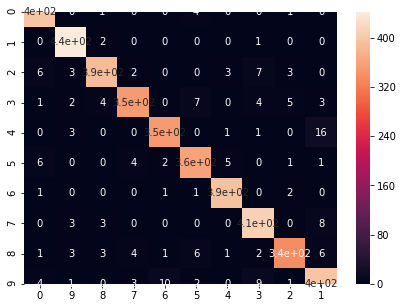

************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       402
           1       0.97      0.99      0.98       445
           2       0.97      0.94      0.95       411
           3       0.96      0.93      0.95       377
           4       0.96      0.94      0.95       373
           5       0.95      0.95      0.95       379
           6       0.98      0.99      0.98       398
           7       0.94      0.97      0.96       424
           8       0.96      0.93      0.94       365
           9       0.92      0.93      0.93       426

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000

************************************************************************
For k=3 metrics: 
accuracy : 0.95575 
precision : 0.9570099753134402 
recall : 0.95495652257260

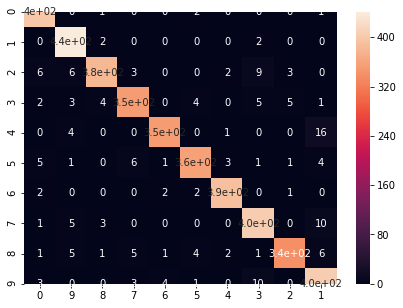

************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       402
           1       0.95      0.99      0.97       445
           2       0.97      0.93      0.95       411
           3       0.95      0.94      0.95       377
           4       0.98      0.94      0.96       373
           5       0.96      0.94      0.95       379
           6       0.98      0.98      0.98       398
           7       0.94      0.96      0.95       424
           8       0.97      0.93      0.95       365
           9       0.91      0.95      0.93       426

    accuracy                           0.96      4000
   macro avg       0.96      0.95      0.96      4000
weighted avg       0.96      0.96      0.96      4000

************************************************************************
For k=5 metrics: 
accuracy : 0.9545 
precision : 0.9557701166286113 
recall : 0.953645459632064

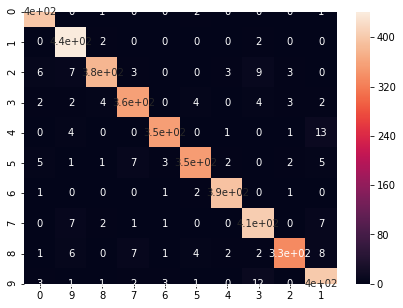

************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       402
           1       0.94      0.99      0.96       445
           2       0.97      0.92      0.95       411
           3       0.95      0.94      0.95       377
           4       0.98      0.95      0.96       373
           5       0.96      0.93      0.95       379
           6       0.98      0.99      0.98       398
           7       0.93      0.96      0.95       424
           8       0.97      0.92      0.94       365
           9       0.92      0.95      0.93       426

    accuracy                           0.95      4000
   macro avg       0.96      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

************************************************************************
For k=7 metrics: 
accuracy : 0.951 
precision : 0.9524910488110334 
recall : 0.9501339114049715

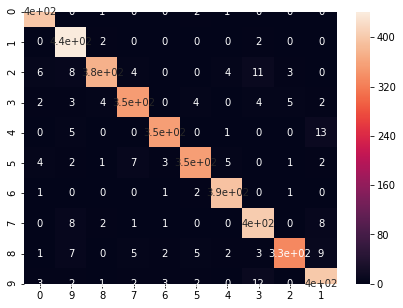

************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       402
           1       0.93      0.99      0.96       445
           2       0.97      0.91      0.94       411
           3       0.95      0.94      0.94       377
           4       0.97      0.95      0.96       373
           5       0.96      0.93      0.95       379
           6       0.97      0.99      0.98       398
           7       0.93      0.95      0.94       424
           8       0.97      0.91      0.94       365
           9       0.92      0.94      0.93       426

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

************************************************************************
For k=9 metrics: 
accuracy : 0.94925 
precision : 0.9509974071029299 
recall : 0.94818496875569

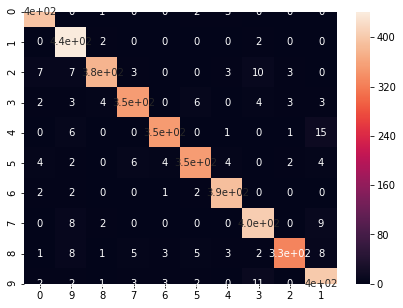

************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       402
           1       0.92      0.99      0.95       445
           2       0.97      0.92      0.95       411
           3       0.95      0.93      0.94       377
           4       0.97      0.94      0.95       373
           5       0.95      0.93      0.94       379
           6       0.97      0.98      0.97       398
           7       0.93      0.96      0.94       424
           8       0.97      0.90      0.94       365
           9       0.91      0.94      0.93       426

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

************************************************************************
For k=11 metrics: 
accuracy : 0.94625 
precision : 0.9485081546735941 
recall : 0.9451946385316

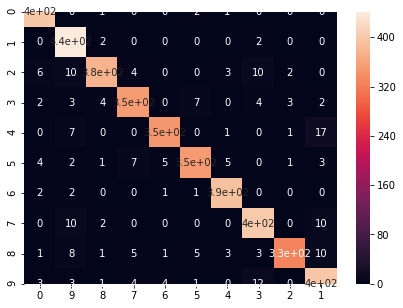

************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       402
           1       0.91      0.99      0.95       445
           2       0.97      0.91      0.94       411
           3       0.95      0.93      0.94       377
           4       0.97      0.93      0.95       373
           5       0.96      0.93      0.94       379
           6       0.97      0.98      0.98       398
           7       0.93      0.95      0.94       424
           8       0.98      0.90      0.94       365
           9       0.90      0.93      0.92       426

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

************************************************************************


In [21]:
labels=df_test[:,0]
k=[1,3,5,7,9,11]
label=['accuracy','precision','recall','F1-Score']
result=[]
for kVal in k:
    myknn=KNN(kVal)
    predictions=myknn.knn(df_train, df_test)
    res=calc_metrics(predictions,labels)
    print("For k={} metrics: ".format(kVal))
    for r in range(0, len(res)):
        print("{} : {} ".format(label[r],res[r]))
        #print(label[r]+" : "+res[r])
    print("Confusion Matrix");
    cm=confusion_matrix(labels, predictions)
    df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0987654321"])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()
    print("************************************************************************")
    print(cr(labels , predictions))
    print("************************************************************************")
    result.append(res)
    
    

# Plot graph to report accuracy, precision, recall, F1-Score of KNN  using Euclidean distance with change in value of K

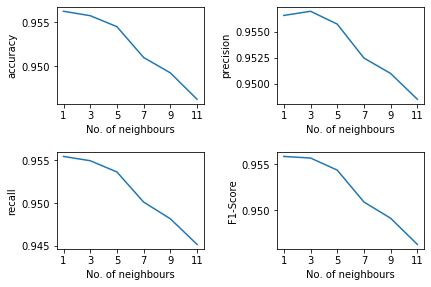

In [22]:
npRes=np.array(result)
import matplotlib.pyplot as plt
label=['accuracy','precision','recall','F1-Score']
for i in range(0,len(result[0])):
    ax = plt.subplot(2, 2, i + 1)
    ax.plot(np.array(k),npRes[:,i])
    ax.set_xlabel("No. of neighbours")
    ax.set_ylabel(label[i])
    plt.xticks(np.array(k))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,wspace=0.50)
plt.show(ax)

# KNN using manhattan

In [23]:
class KNN_MANHATTAN:
    def __init__(self,num_neighbors):
        self.num_neighbors=num_neighbors
    def manhattan(self,train,test):
        return cdist(np.delete(df_train, np.s_[0:1], axis=1), np.delete(df_test, np.s_[0:1], axis=1), metric='cityblock')
    def get_neighbors(self,dist, df_train):
        distances = list()
        for i in range(0,len(dist)):
            distances.append((df_train[i][0], dist[i]))
        distances.sort(key=lambda tup: tup[1])
        neighbors = list()
        for i in range(self.num_neighbors):
            neighbors.append(distances[i][0])
        return neighbors
    def predict_classification(self,dist, train):
        neighbors = self.get_neighbors(dist,train)
        output_values=[]
        for i in range(len(neighbors)):
            output_values.append(neighbors[i])
        prediction=max(set(output_values), key=output_values.count)
        return prediction
    
    def knn(self,df_train,df_test):
        predict=[]
        manhattan_dist=self.manhattan(df_train,df_test)
        for i in range(0,len(df_test)):
            pre=self.predict_classification(manhattan_dist[:,i],df_train)
            predict.append(pre);
        return predict

For k=1 metrics: 
accuracy : 0.947 
precision : 0.9482310261237918 
recall : 0.9458785640152898 
F1-Score : 0.9465916395632415 
Confusion Matrix


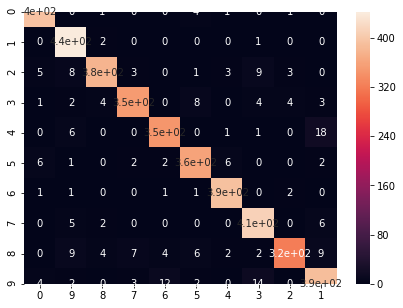

************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       402
           1       0.93      0.99      0.96       445
           2       0.97      0.92      0.94       411
           3       0.96      0.93      0.94       377
           4       0.95      0.93      0.94       373
           5       0.94      0.95      0.95       379
           6       0.97      0.98      0.98       398
           7       0.93      0.97      0.95       424
           8       0.97      0.88      0.92       365
           9       0.91      0.91      0.91       426

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

************************************************************************
For k=3 metrics: 
accuracy : 0.94825 
precision : 0.9500662910024525 
recall : 0.94715318403078

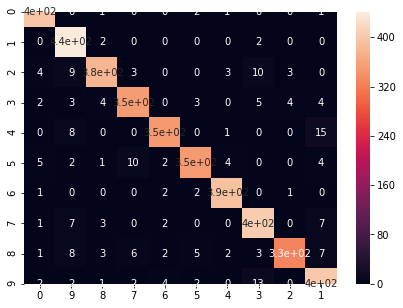

************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       402
           1       0.92      0.99      0.95       445
           2       0.96      0.92      0.94       411
           3       0.94      0.93      0.94       377
           4       0.97      0.94      0.95       373
           5       0.96      0.93      0.94       379
           6       0.97      0.98      0.98       398
           7       0.92      0.95      0.94       424
           8       0.98      0.90      0.94       365
           9       0.91      0.94      0.93       426

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

************************************************************************
For k=5 metrics: 
accuracy : 0.946 
precision : 0.9477313119833178 
recall : 0.9449172953986885

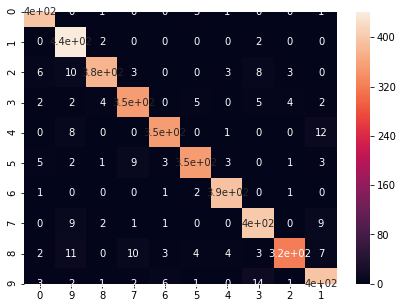

************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       402
           1       0.91      0.99      0.95       445
           2       0.97      0.92      0.95       411
           3       0.93      0.94      0.94       377
           4       0.96      0.94      0.95       373
           5       0.96      0.93      0.94       379
           6       0.97      0.99      0.98       398
           7       0.93      0.95      0.94       424
           8       0.97      0.88      0.92       365
           9       0.92      0.93      0.93       426

    accuracy                           0.95      4000
   macro avg       0.95      0.94      0.95      4000
weighted avg       0.95      0.95      0.95      4000

************************************************************************
For k=7 metrics: 
accuracy : 0.943 
precision : 0.9454611960603669 
recall : 0.9418894789032702

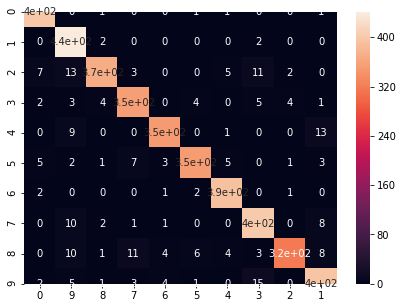

************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       402
           1       0.89      0.99      0.94       445
           2       0.97      0.90      0.93       411
           3       0.93      0.94      0.94       377
           4       0.96      0.94      0.95       373
           5       0.96      0.93      0.94       379
           6       0.96      0.98      0.97       398
           7       0.92      0.95      0.93       424
           8       0.98      0.87      0.92       365
           9       0.92      0.93      0.92       426

    accuracy                           0.94      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

************************************************************************
For k=9 metrics: 
accuracy : 0.94125 
precision : 0.9445853560736541 
recall : 0.93998253319956

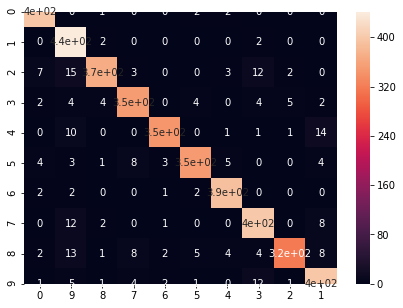

************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       402
           1       0.87      0.99      0.93       445
           2       0.97      0.90      0.93       411
           3       0.94      0.93      0.94       377
           4       0.97      0.93      0.95       373
           5       0.96      0.93      0.94       379
           6       0.96      0.98      0.97       398
           7       0.92      0.95      0.93       424
           8       0.97      0.87      0.92       365
           9       0.92      0.94      0.93       426

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

************************************************************************
For k=11 metrics: 
accuracy : 0.93675 
precision : 0.9409088099507056 
recall : 0.9353631871474

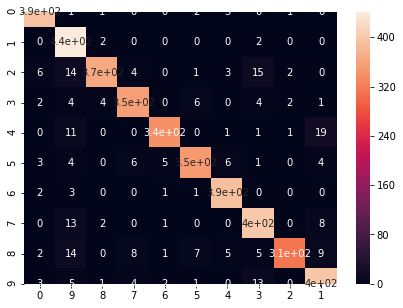

************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       402
           1       0.86      0.99      0.92       445
           2       0.97      0.89      0.93       411
           3       0.94      0.94      0.94       377
           4       0.97      0.91      0.94       373
           5       0.95      0.92      0.94       379
           6       0.96      0.98      0.97       398
           7       0.91      0.94      0.92       424
           8       0.98      0.86      0.92       365
           9       0.91      0.93      0.92       426

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

************************************************************************


In [25]:
labels=df_test[:,0]
k=[1,3,5,7,9,11]
result_manhattan=[]
for kVal in k:
    myknn=KNN_MANHATTAN(kVal)
    predictions=myknn.knn(df_train, df_test)
    res=calc_metrics(predictions,labels)
    
    predictions=myknn.knn(df_train, df_test)
    res=calc_metrics(predictions,labels)
    print("For k={} metrics: ".format(kVal))
    for r in range(0, len(res)):
        print("{} : {} ".format(label[r],res[r]))
        #print(label[r]+" : "+res[r])
    print("Confusion Matrix");
    cm=confusion_matrix(labels, predictions)
    df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0987654321"])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()
    print("************************************************************************")
    print(cr(labels , predictions))
    print("************************************************************************")
    result_manhattan.append(res)

# Plot graph to report accuracy, precision, recall, F1-Score of KNN using Manhattan distance with change in value of K

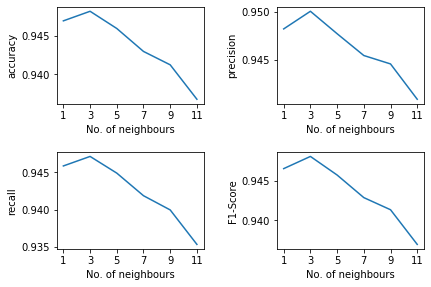

In [26]:
npManhattanRes=np.array(result_manhattan)
import matplotlib.pyplot as plt
label=['accuracy','precision','recall','F1-Score']
for i in range(0,len(result_manhattan[0])):
    ax = plt.subplot(2, 2, i + 1)
    ax.plot(np.array(k),npManhattanRes[:,i])
    ax.set_xlabel("No. of neighbours")
    ax.set_ylabel(label[i])
    #plt.yticks(np.array(np.arange(0.9, 1, step=0.01)))
    plt.xticks(np.array(k))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,wspace=0.50)
plt.show(ax)

# KNN using scikit learn

In [27]:
l=df[[0]]
d=df.drop(0,axis=1)

print(l.shape)
print(d.shape)

(20000, 1)
(20000, 784)


In [28]:
train,train_label,test,test_label=train_test_split(np.array(d),np.array(l) , test_size=0.2)
print(train.shape)
print(train_label.shape)
print(test.shape)
print(test_label.shape)

(16000, 784)
(4000, 784)
(16000, 1)
(4000, 1)


In [29]:
labels=df_test[:,0]
k=[1,3,5,7,9,11]
result_knn_scikit=[]
for kval in k:
    knn = KNeighborsClassifier(n_neighbors=kval)
    knn.fit(train, test)
    pred = knn.predict(train_label)
    res=calc_metrics(pred,labels)
    result_knn_scikit.append(res)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

# Plot graph to report accuracy, precision, recall, F1-Score of KNN using ScikitLearn with change in value of K

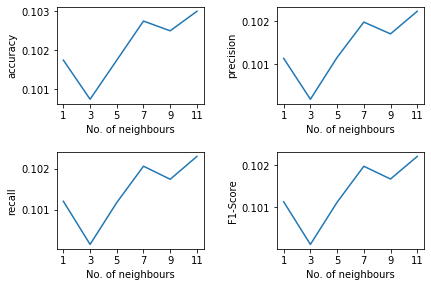

In [30]:
npScikitRes=np.array(result_knn_scikit)
import matplotlib.pyplot as plt
label=['accuracy','precision','recall','F1-Score']
for i in range(0,len(result_knn_scikit[0])):
    ax = plt.subplot(2, 2, i + 1)
    ax.plot(np.array(k),npScikitRes[:,i])
    ax.set_xlabel("No. of neighbours")
    ax.set_ylabel(label[i])
    plt.xticks(np.array(k))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,wspace=0.50)
plt.show(ax)

# Plot graph  to compare metrics of Euclidean and Manhattan

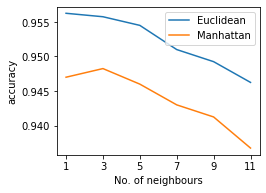

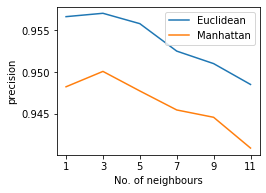

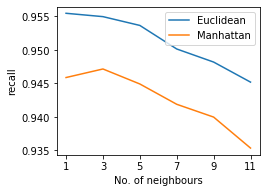

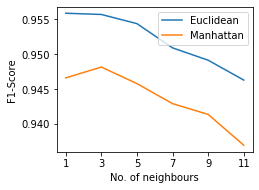

In [31]:
import matplotlib.pyplot as plt
label=['accuracy','precision','recall','F1-Score']
for i in range(0,len(result_manhattan[0])):
    fig=plt.figure(figsize=(8, 6))
    ax = plt.subplot(2, 2, i + 1)
    ax.plot(np.array(k),npRes[:,i],label="Euclidean")
    ax.plot(np.array(k),npManhattanRes[:,i], label="Manhattan")
    ax.set_xlabel("No. of neighbours")
    ax.set_ylabel(label[i])
    ax.legend(loc="upper right")
    plt.xticks(np.array(k))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,wspace=0.50)
plt.show(ax)

# Plot graph to compare metrics of Euclidean and KNN-ScikitLearn

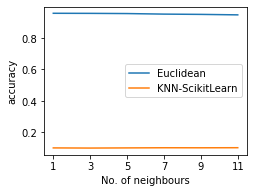

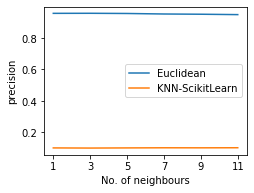

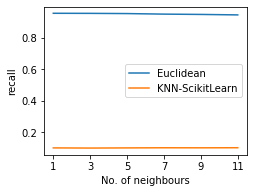

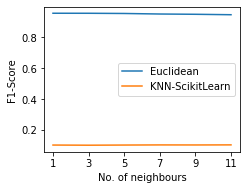

In [32]:
import matplotlib.pyplot as plt
label=['accuracy','precision','recall','F1-Score']
for i in range(0,len(result_manhattan[0])):
    fig=plt.figure(figsize=(8, 6))
    ax = plt.subplot(2, 2, i + 1)
    ax.plot(np.array(k),npRes[:,i],label="Euclidean")
    ax.plot(np.array(k),npScikitRes[:,i], label="KNN-ScikitLearn")
    ax.set_xlabel("No. of neighbours")
    ax.set_ylabel(label[i])
    ax.legend(loc="best")
    plt.xticks(np.array(k))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,wspace=0.50)
plt.show(ax)

# Plot graph to compare metrics of Manhattan and KNN-ScikitLearn

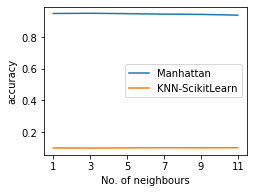

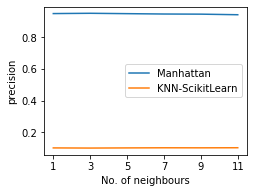

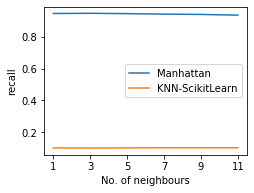

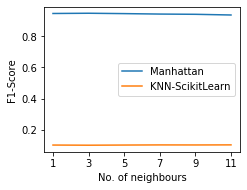

In [33]:
import matplotlib.pyplot as plt
label=['accuracy','precision','recall','F1-Score']
for i in range(0,len(result_manhattan[0])):
    fig=plt.figure(figsize=(8, 6))
    ax = plt.subplot(2, 2, i + 1)
    ax.plot(np.array(k),npManhattanRes[:,i],label="Manhattan")
    ax.plot(np.array(k),npScikitRes[:,i], label="KNN-ScikitLearn")
    ax.set_xlabel("No. of neighbours")
    ax.set_ylabel(label[i])
    ax.legend(loc="best")
    plt.xticks(np.array(k))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,wspace=0.50)
plt.show(ax)

# Compare metrics of all

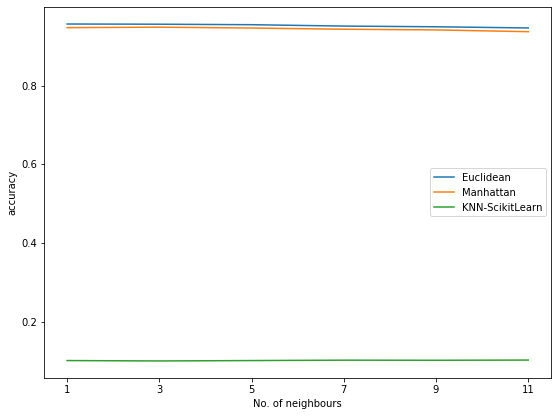

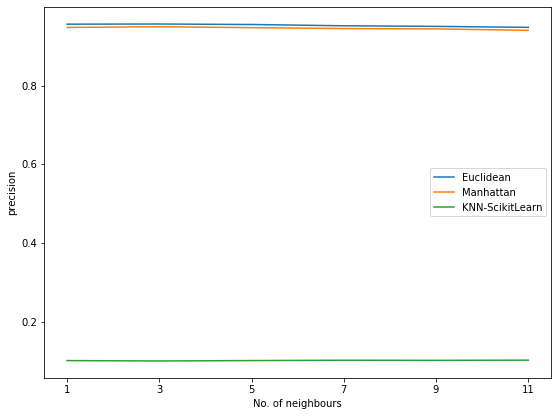

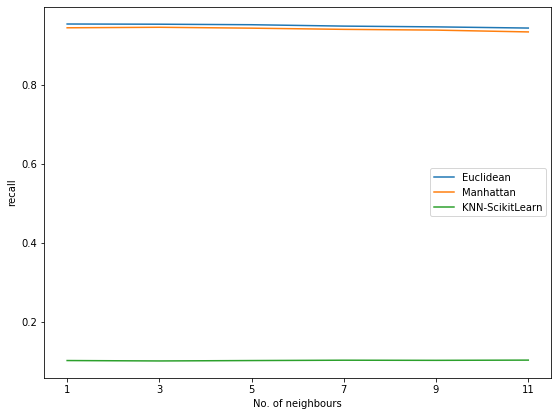

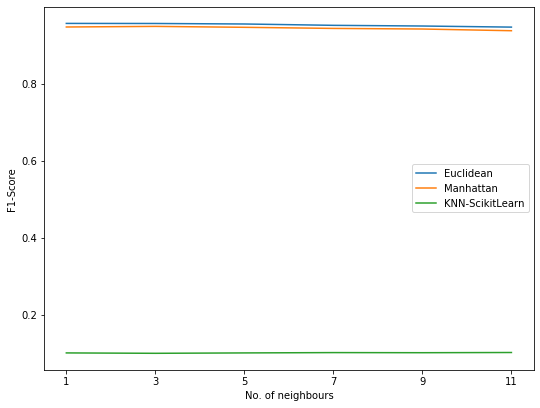

In [34]:
import matplotlib.pyplot as plt
label=['accuracy','precision','recall','F1-Score']
for i in range(0,len(result_manhattan[0])):
    fig=plt.figure(figsize=(20, 15))
    ax = plt.subplot(2, 2, i + 1)
    ax.plot(np.array(k),npRes[:,i],label="Euclidean")
    ax.plot(np.array(k),npManhattanRes[:,i],label="Manhattan")
    ax.plot(np.array(k),npScikitRes[:,i], label="KNN-ScikitLearn")
    ax.set_xlabel("No. of neighbours")
    ax.set_ylabel(label[i])
    ax.legend(loc="best")
    plt.xticks(np.array(k))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,wspace=0.50)
plt.show(ax)